<a href="https://colab.research.google.com/github/vinicius-mattoso/LearningPython/blob/main/Tutorial_matriz_sparse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matriz esparsa ou Sparse matrix

por definição é uma matriz que possui grande parte dos seus valores nulos. Normalmente quem faz programas de calculo computacional por meio do método das diferenças finitas se depara com esse tipo de matriz. Por tanto esse tutorial, vou explicar de maenira breve uma forma de trabalhar com esse tipo de matrix.


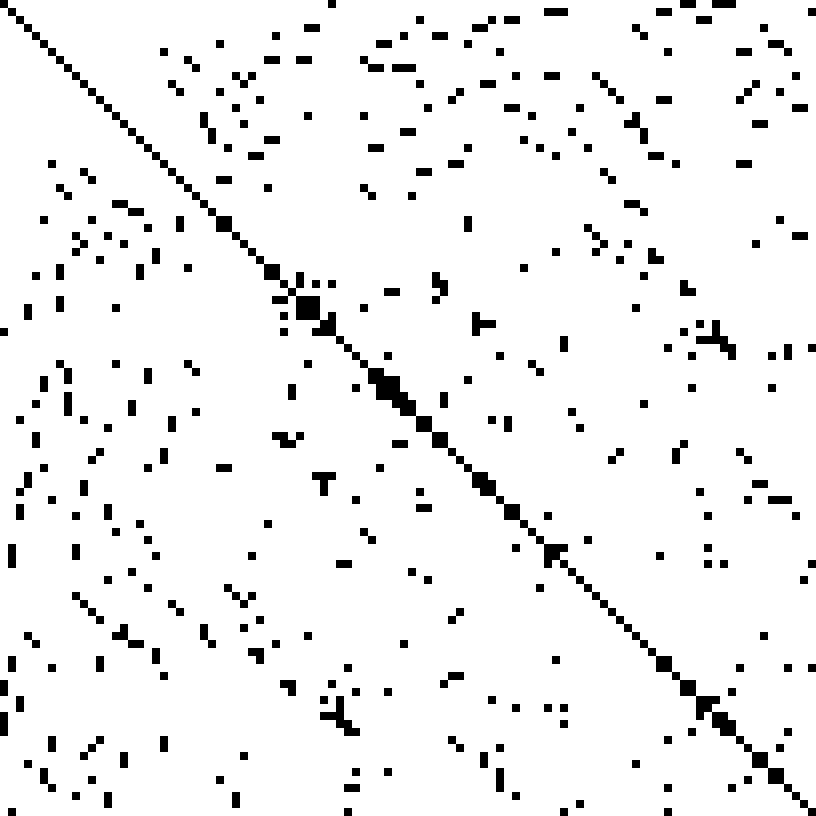

Os elementos diferentes de zero estão marcados com elementos pintados de preto.

fonte: https://en.wikipedia.org/wiki/Sparse_matrix#/media/File:Finite_element_sparse_matrix.png

Uma biblioteca muito usual para projetos numéricos é a scipy. E nesse caso, vamos utilizar seus sub modulos voltados para matriz esparsa

In [4]:
# Aprendendo a usar as biliotecas para o sparse
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve

In [58]:
# Compressed Sparse Column matrix (CSC)
A_dense = [[3, 2, 0], [1, -1, 0], [0, 5, 1]]
print(type(A_dense))
A_dense

<class 'list'>


[[3, 2, 0], [1, -1, 0], [0, 5, 1]]

In [59]:
A = csc_matrix(A_dense, dtype=float)
type(A) 

scipy.sparse.csc.csc_matrix

Montando visualmente a nossa matriz A_dense
______________
| 3 | 2  | 0 |
--------------
| 1 | -1 | 0 |
--------------
| 0 | 5  | 1 |
--------------
______________


In [6]:
print(A)

  (0, 0)	3.0
  (1, 0)	1.0
  (0, 1)	2.0
  (1, 1)	-1.0
  (2, 1)	5.0
  (2, 2)	1.0


In [7]:
# Criando uma nova matriz esparsa
B = csc_matrix([[2, 0], [-1, 0], [2, 0]], dtype=float)
type(B)

scipy.sparse.csc.csc_matrix

In [8]:
print(B)

  (0, 0)	2.0
  (1, 0)	-1.0
  (2, 0)	2.0


In [60]:
# Resolvendo o sistema linear Ax=B utilizando um solver específico para matriz esparsa
x = spsolve(A, B)
print(x)

  (1, 0)	1.0
  (2, 0)	-3.0


## Criando um sistema com matrizes densas para comprar as respostas

In [11]:
import numpy as np

np.allclose(A.dot(x).todense(), B.todense())

True

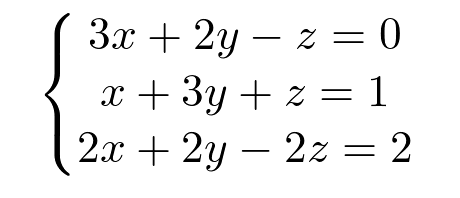

In [12]:
A_full=[[3,2,-1],[1,3,1],[2,2,-2]]
B_full=[0,1,2]

In [13]:
#Resolvendo 
from scipy import linalg
from numpy.linalg import inv
# X_full=linalg.solve(A_full, B_full)
X_full=inv(A_full) @ B_full

print(X_full)

[-1.  1. -1.]


## Outra maneira de se criar matriz esparsas

Dessa vez, podemos passar 3 listas para criar, onde temos: O valor a ser alocada, a linha e a coluna desse alocamento

In [14]:
#Resolvendo de maneira sparsa
linha=[0,0,0,1,1,1,2,2,2]
col=[0,1,2,0,1,2,0,1,2]
data=[3,2,-1,1,3,1,2,2,-2]
#Criando a matriz
A = csc_matrix([linha, col, data], dtype=float)

In [15]:
print(A)

  (2, 0)	3.0
  (1, 1)	1.0
  (2, 1)	2.0
  (1, 2)	2.0
  (2, 2)	-1.0
  (0, 3)	1.0
  (2, 3)	1.0
  (0, 4)	1.0
  (1, 4)	1.0
  (2, 4)	3.0
  (0, 5)	1.0
  (1, 5)	2.0
  (2, 5)	1.0
  (0, 6)	2.0
  (2, 6)	2.0
  (0, 7)	2.0
  (1, 7)	1.0
  (2, 7)	2.0
  (0, 8)	2.0
  (1, 8)	2.0
  (2, 8)	-2.0


A sparse matrix in COOrdinate format.

Utilizar o formato coordinate, tbm nos permite criar uma matriz esparsa

In [16]:
#create COO sparse matrix from three arrays
from scipy import sparse
mat_coo = sparse.coo_matrix((data, (linha, col)))

In [17]:
# print coo_matrix
print(mat_coo)

  (0, 0)	3
  (0, 1)	2
  (0, 2)	-1
  (1, 0)	1
  (1, 1)	3
  (1, 2)	1
  (2, 0)	2
  (2, 1)	2
  (2, 2)	-2


In [18]:
x_sparse = spsolve(mat_coo, B_full)
print(x_sparse)

[-1.  1. -1.]


/usr/local/lib/python3.8/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
